# Multiple linear regression - hypothesis testing, outliers, high-leverage points

This exercise is useful to see:

- generation of a random dataset
- collinearity issues
- high leverage and outlier points

Import all the packages that we need.

In [2]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix 
from statsmodels.stats.outliers_influence import OLSInfluence

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

a) Consider the following model:
$𝑦=2+2𝑥_1+0.3𝑥_2+\epsilon_1$,
and generate a population as follows:
$𝑥_1∼𝑈𝑛𝑖(0,1)$  and  $𝑥_2=0.5𝑥_1+\frac{\epsilon_2}{10}$,  where  $\epsilon_1∼𝑁(0,1)$ and $\epsilon_2∼𝑁(0,1)$. Here $[𝛽_0,𝛽_1,𝛽_2]=[2,2,0.3]$.
(Use a random seed of 0 for the randomly created values)

In [3]:
np.random.seed(0)
x1 = np.random.random(100)
epsilon1 = np.random.randn(100)
epsilon2 = np.random.randn(100)
x2 = 0.5 * x1 + epsilon1/10
y = (2 + 2*x1 + 0.3*x2 + epsilon2)

b) What is the correlation between $x_1$ and $x_2$? Create a scatterplot displaying the relationship between the variables.

In [4]:
correlation = np.corrcoef(x1,x2)
print(correlation)

[[1.         0.81926336]
 [0.81926336 1.        ]]


In [5]:
df = pd.DataFrame(np.column_stack((y,x1,x2)), columns=['y', 'x1', 'x2'])
df.head()

,y,x1,x2
0,2.791001,0.548814,0.157892
1,2.189731,0.715189,0.447677
2,2.666293,0.602763,0.347948
3,0.902008,0.544883,0.118817
4,3.580737,0.423655,0.360653


array([[<Axes: xlabel='y', ylabel='y'>, <Axes: xlabel='x1', ylabel='y'>,
        <Axes: xlabel='x2', ylabel='y'>],
       [<Axes: xlabel='y', ylabel='x1'>,
        <Axes: xlabel='x1', ylabel='x1'>,
        <Axes: xlabel='x2', ylabel='x1'>],
       [<Axes: xlabel='y', ylabel='x2'>,
        <Axes: xlabel='x1', ylabel='x2'>,
        <Axes: xlabel='x2', ylabel='x2'>]], dtype=object)

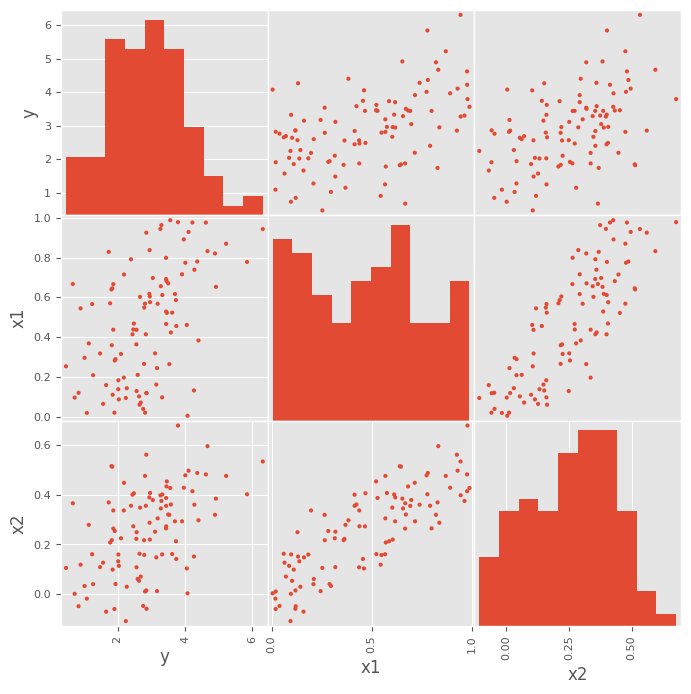

In [6]:
scatter_matrix(df, alpha=1, figsize=(8,8), diagonal = 'hist')

c)  
- Fit a least squares regression to predict y using x1 and x2. Describe the results obtained. 
- What are $\hat{\beta}_0, \hat{\beta}_1$, and $\hat{\beta}_2$? How do these relate to the true values?   
- Can you reject the null hypothesis $H_0: \beta_1=0$? How about the null hypothesis $H_0:\beta_2=0$?

In [7]:
X = sm.add_constant(df[['x1', 'x2']])
y = df.y

model = sm.OLS(y,X)
estimate = model.fit()

print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.16
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           4.16e-07
Time:                        17:57:05   Log-Likelihood:                -139.04
No. Observations:                 100   AIC:                             284.1
Df Residuals:                      97   BIC:                             291.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9217      0.191     10.071      0.0

d)
- Fit a least squares regression to predict y using only $x_1$. Comment on your results. Can you reject the null hypothesis $H_0:\beta_1=0$?
- Fit a least squares regression to predict y using only $x_2$. Comment on your results. Can you reject the null hypothesis $H_0:\beta_2=0$?
- Do the previous results contraddict each other?

In [8]:
X = sm.add_constant(df.x1)
model_x1 = sm.OLS(y,X)

estimate_x1 = model_x1.fit()
print(estimate_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.64
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           1.76e-07
Time:                        17:57:05   Log-Likelihood:                -140.20
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      98   BIC:                             289.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9548      0.191     10.247      0.0

In [9]:
X = sm.add_constant(df.x2)
model_x2 = sm.OLS(y,X)

estimate_x2 = model_x2.fit()
print(estimate_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     29.37
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           4.29e-07
Time:                        17:57:05   Log-Likelihood:                -141.09
No. Observations:                 100   AIC:                             286.2
Df Residuals:                      98   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0721      0.178     11.623      0.0

e) Now assume that we obtain an additional observation, which is unfortunately mismeasured. ($x_1=0.1, x_2=0.8, y=6$). 
Re-fit the linear model from task c) using this new data. 
- What effect does this new observation have on the previous model containing both variables? 
- In each model, is this observation an outlier? A high-leverage point? Both? Explain your answer.

In [10]:
df.loc[len(df)] = [6, 0.1, 0.8]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     18.85
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           1.18e-07
Time:                        17:57:05   Log-Likelihood:                -142.48
No. Observations:                 101   AIC:                             291.0
Df Residuals:                      98   BIC:                             298.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9480      0.194     10.025      0.0

Text(0, 0.5, 'studentized residuals')

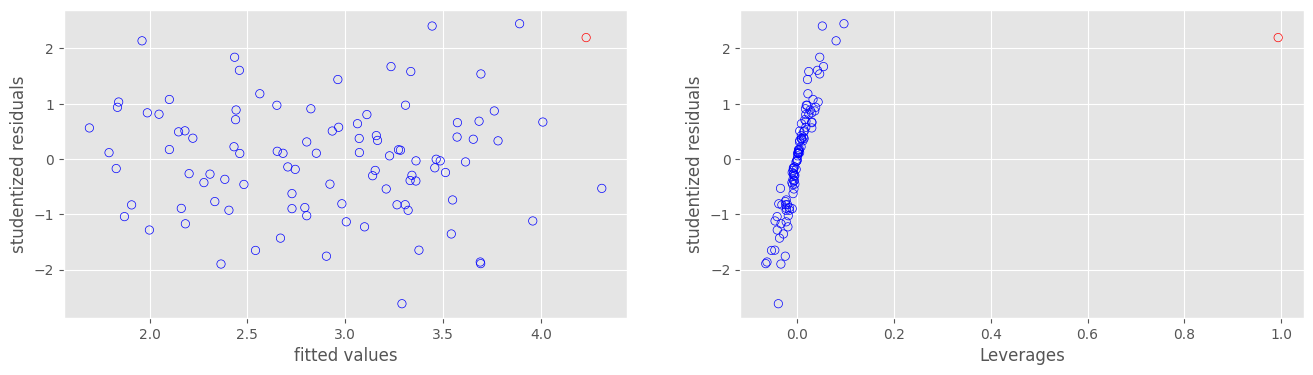

In [11]:
X = sm.add_constant(df[['x1', 'x2']])

model = sm.OLS(df.y, X)
estimate = model.fit()

print(estimate.summary())

# Obtain the residuals, studentized residuals and the leverages
fitted_values = estimate.fittedvalues
residuals = estimate.resid.values
studentized_residuals = OLSInfluence(estimate).resid_studentized_internal
leverages = OLSInfluence(estimate).influence

# Plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

# Studentized Residuals
ax1.scatter(fitted_values[:-1], studentized_residuals[:-1], facecolors='none', edgecolors='b')
# Plot the possible Outlier in red
ax1.scatter(fitted_values[len(fitted_values)-1], studentized_residuals[len(fitted_values)-1], facecolors='none', edgecolors='r')
ax1.set_xlabel('fitted values')
ax1.set_ylabel('studentized residuals')


# Leverages
ax2.scatter(leverages[:-1], studentized_residuals[:-1], facecolors='none', edgecolors='b')
# plot the possible high leverager in red
ax2.scatter(leverages[len(leverages)-1], studentized_residuals[len(leverages)-1], facecolors='none', edgecolors='r')
ax2.set_xlabel('Leverages')
ax2.set_ylabel('studentized residuals')